In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv


# ETL

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
#Check files in input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv


In [4]:
df_test = pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv', delimiter=',')
nRow, nCol = df_test.shape
print('There are {} rows and {} columns in the test set'.format(nRow, nCol))

There are 3798 rows and 6 columns in the test set


In [5]:
df_train = pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv', delimiter=',', engine='python')
nRow, nCol = df_train.shape
print('There are {} rows and {} columns in the train set'.format(nRow, nCol))

There are 41157 rows and 6 columns in the train set


In [6]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [8]:
# Change "TweetAt" to "Date" since it is more intuitive

df_train = df_train.rename(columns = {"TweetAt" : "Date"})
df_test = df_test.rename(columns = {"TweetAt" : "Date"})

# Drop username since it is the same as index and screenname since it adds nothing useful 

df_train = df_train.drop(["UserName", "ScreenName"], 1)
df_test = df_test.drop(["UserName", "ScreenName"], 1)

In [9]:
df_train.head()

,Location,Date,OriginalTweet,Sentiment
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [10]:
df_test.head()

,Location,Date,OriginalTweet,Sentiment
0,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


# Initial Data Exploration

In [11]:
# List unique sentiments to see all possible labels

df_train.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [12]:
df_test.Sentiment.unique()

array(['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative',
       'Neutral'], dtype=object)

In [13]:
df_train.Date.unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [14]:
df_test.Date.unique()

array(['02-03-2020', '03-03-2020', '04-03-2020', '05-03-2020',
       '06-03-2020', '07-03-2020', '08-03-2020', '09-03-2020',
       '10-03-2020', '11-03-2020', '12-03-2020', '13-03-2020',
       '14-03-2020', '15-03-2020', '16-03-2020'], dtype=object)

Dates are between approximately the start of March and mid-April. 

In [15]:
# Concatenate dataframes for bigger dataset for exploration

df = pd.concat([df_train, df_test], ignore_index=True) 
df.head()

,Location,Date,OriginalTweet,Sentiment
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [16]:
# Transform date into sortable value

def change_date(d):

    from datetime import datetime
    
    # now convert the string into datetime object given the pattern
    d = datetime.strptime(d, "%d-%m-%Y")
    
    
    
    # now convert datetime back into string but in specified format
    d = datetime.strftime(d, "%m-%d-%Y")
    d = datetime.strptime(d, "%m-%d-%Y")

    
    return d
    
change_date(df.Date[0])

datetime.datetime(2020, 3, 16, 0, 0)

In [17]:
df["Date"] = df["Date"].apply(change_date)

In [18]:
df.head()

,Location,Date,OriginalTweet,Sentiment
0,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [19]:
# Sort by date

df = df.sort_values(by="Date")
df.head()

,Location,Date,OriginalTweet,Sentiment
41157,NYC,2020-03-02,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
41158,"Seattle, WA",2020-03-02,When I couldn't find hand sanitizer at Fred Me...,Positive
41159,NaN,2020-03-02,Find out how you can protect yourself and love...,Extremely Positive
41160,Chicagoland,2020-03-02,#Panic buying hits #NewYork City as anxious sh...,Negative
41161,"Melbourne, Victoria",2020-03-03,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [20]:
df.tail()

,Location,Date,OriginalTweet,Sentiment
40965,United States,2020-04-14,#Gold prices well-supported as keeping interes...,Extremely Negative
40964,NaN,2020-04-14,Breweries are making hand sanitizer over booze...,Positive
40963,NaN,2020-04-14,Just scolded my dad who wanted to go supermark...,Extremely Negative
40969,#WeAreThePatriots,2020-04-14,27-year-old grocery store clerk kept working b...,Negative
41064,Brisbane,2020-04-14,101 Things to do with Toilet Paper #COVID19 #c...,Neutral


In [21]:
df["OriginalTweet"] = df["OriginalTweet"].astype(str)

In [22]:
# Count number of tweets of each sentiment category for each date

df_date = df.groupby(['Date', 'Sentiment']).size().reset_index()
df_date.head()

,Date,Sentiment,0
0,2020-03-02,Extremely Negative,1
1,2020-03-02,Extremely Positive,1
2,2020-03-02,Negative,1
3,2020-03-02,Positive,1
4,2020-03-03,Neutral,3


In [23]:
df_date.columns = ["date", "sentiment", "count"]

In [24]:
df_date.head()

,date,sentiment,count
0,2020-03-02,Extremely Negative,1
1,2020-03-02,Extremely Positive,1
2,2020-03-02,Negative,1
3,2020-03-02,Positive,1
4,2020-03-03,Neutral,3


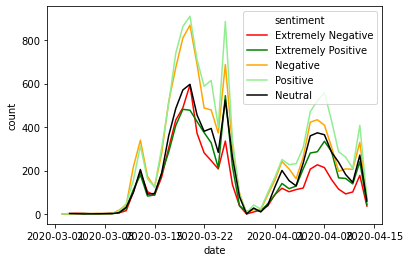

In [25]:
import seaborn as sns

sns.lineplot(data=df_date, x="date", y="count", hue="sentiment", palette= ["red", "green", "orange", "lightgreen", "black"])

The strong correlation between shapes intuitively makes sense since the main driver of tweets is probably just COVID-19 being in the news. As it is quite hard to exactly how the sentiment varies, I'm going to try a stacked area chart instead.

To do this, I will first need to change the structure of the dataframe.

In [26]:
df_pivoted = df_date.pivot_table('count', ['date'], 'sentiment')
df_pivoted.head()

sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
date,,,,,
2020-03-02,1.0,1.0,1.0,NaN,1.0
2020-03-03,NaN,NaN,NaN,3.0,1.0
2020-03-04,4.0,2.0,NaN,NaN,2.0
2020-03-05,NaN,3.0,1.0,1.0,1.0
2020-03-06,NaN,2.0,NaN,NaN,NaN


In [27]:
df_pivoted = df_pivoted.fillna(0)
df_pivoted.head()

sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
date,,,,,
2020-03-02,1.0,1.0,1.0,0.0,1.0
2020-03-03,0.0,0.0,0.0,3.0,1.0
2020-03-04,4.0,2.0,0.0,0.0,2.0
2020-03-05,0.0,3.0,1.0,1.0,1.0
2020-03-06,0.0,2.0,0.0,0.0,0.0


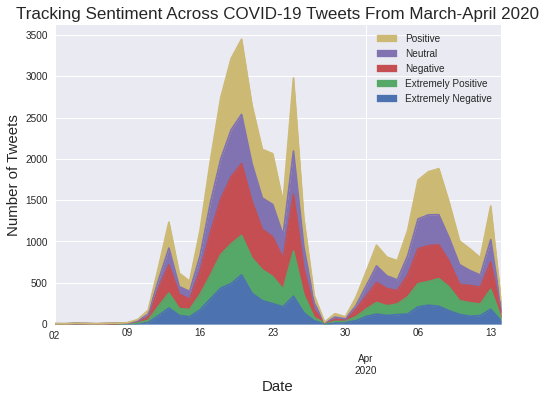

In [28]:
plt.style.use('seaborn')
df_pivoted.plot.area()
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Tweets', fontsize=15)
plt.title('Tracking Sentiment Across COVID-19 Tweets From March-April 2020',fontsize=17)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))
ax.legend(handles, labels)
plt.show()

This is somewhat useful, but again, it is hard to tell exactly how sentiment has varied.

In [29]:
df_desc = df_pivoted.describe()

In [30]:
df_desc.head()

sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,138.022727,164.159091,249.045455,189.363636,281.113636
std,142.712671,155.203684,238.971532,176.748158,269.499727
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.500000,20.750000,21.500000,23.500000,37.500000


This is a more useful description. Since we cover 44 days, it might make sense to split the df into 6 weeks (+2 days) of data, on which we compute the same descriptive statistics.

In [31]:
len(df_pivoted)

44

In [32]:
# split data by week

df1, df2, df3, df4, df5, df6 = np.array_split(df_pivoted.iloc[:42], 6)
df7 = df_pivoted.iloc[42:]
df6 = pd.concat([df6, df7])

In [33]:
# Check split is correct

df1

sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
date,,,,,
2020-03-02,1.0,1.0,1.0,0.0,1.0
2020-03-03,0.0,0.0,0.0,3.0,1.0
2020-03-04,4.0,2.0,0.0,0.0,2.0
2020-03-05,0.0,3.0,1.0,1.0,1.0
2020-03-06,0.0,2.0,0.0,0.0,0.0
2020-03-07,1.0,0.0,4.0,0.0,2.0
2020-03-08,3.0,2.0,2.0,2.0,0.0


In [34]:
# Check the last df contains all final values

df6

sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
date,,,,,
2020-04-06,207.0,281.0,423.0,360.0,471.0
2020-04-07,227.0,287.0,434.0,374.0,521.0
2020-04-08,214.0,335.0,409.0,365.0,558.0
2020-04-09,159.0,288.0,309.0,285.0,430.0
2020-04-10,115.0,167.0,197.0,239.0,287.0
2020-04-11,93.0,164.0,208.0,182.0,262.0
2020-04-12,102.0,139.0,206.0,146.0,210.0
2020-04-13,178.0,241.0,330.0,271.0,408.0
2020-04-14,37.0,44.0,69.0,60.0,74.0


In [35]:
df_weekly = pd.concat([df1.describe(), df2.describe(), df3.describe(), df4.describe(), df5.describe(), df6.describe()])
df_weekly = df_weekly.drop(["count", "std", "min", "25%", "50%", 'max', "75%"])
df_weekly

sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
mean,1.285714,1.428571,1.142857,0.857143,1.000000
mean,73.000000,71.571429,131.285714,76.142857,117.428571
mean,377.714286,377.428571,618.142857,434.285714,660.571429
mean,139.285714,196.857143,282.714286,224.857143,340.714286
mean,86.000000,106.571429,162.857143,128.142857,187.142857
mean,148.000000,216.222222,287.222222,253.555556,357.888889


In [36]:
df_weekly.columns

Index(['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral',
       'Positive'],
      dtype='object', name='sentiment')

In [37]:
df_weekly.insert(loc=0, column='weekly mean', value=[1, 2, 3, 4, 5, 6])

In [38]:
df_weekly

sentiment,weekly mean,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
mean,1,1.285714,1.428571,1.142857,0.857143,1.000000
mean,2,73.000000,71.571429,131.285714,76.142857,117.428571
mean,3,377.714286,377.428571,618.142857,434.285714,660.571429
mean,4,139.285714,196.857143,282.714286,224.857143,340.714286
mean,5,86.000000,106.571429,162.857143,128.142857,187.142857
mean,6,148.000000,216.222222,287.222222,253.555556,357.888889


# NLP - Understanding the Data

In [39]:
df.rename(columns={"OriginalTweet": "Tweet"}, inplace=True)
df.head()

,Location,Date,Tweet,Sentiment
41157,NYC,2020-03-02,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
41158,"Seattle, WA",2020-03-02,When I couldn't find hand sanitizer at Fred Me...,Positive
41159,NaN,2020-03-02,Find out how you can protect yourself and love...,Extremely Positive
41160,Chicagoland,2020-03-02,#Panic buying hits #NewYork City as anxious sh...,Negative
41161,"Melbourne, Victoria",2020-03-03,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [40]:
# Take a look at examples of tweets

print (df.Tweet[0], "|| this tweet is marked", df.Sentiment[0], "\n")
print (df.Tweet[1], "|| this tweet is marked", df.Sentiment[1], "\n")
print (df.Tweet[2], "|| this tweet is marked", df.Sentiment[2], "\n")


@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8 || this tweet is marked Neutral 

advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order || this tweet is marked Positive 

Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P || this tweet is marked Positive 



In [41]:
df["word count"] = df['Tweet'].str.split().map(lambda x: len(x))

In [42]:
df["word count"].describe()

count    44955.000000
mean        30.702191
std         11.625269
min          1.000000
25%         21.000000
50%         32.000000
75%         40.000000
max         64.000000
Name: word count, dtype: float64

The tweets seem correctly labelled. However, we will probably lose some content since some tweets are links to other content (from which they derive their sentiment label), and I will only be running a model on text available in tweets themselves.

We should bear this in mind as afactor in reducing accuracy (i.e. a tweet originally containing links may show up in the test set). I plan to strip the text of all html to avoid this, and set a minimum length.

In [43]:
# Check for empty rows

empty = [index for index, Tweet in enumerate(df.Tweet.values) if str(Tweet).strip() == '']
df.iloc[empty]

,Location,Date,Tweet,Sentiment,word count


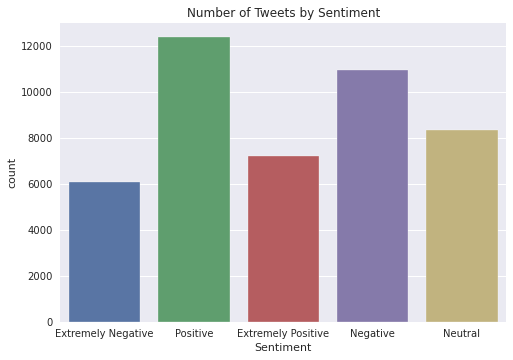

In [44]:
sns.set_style("darkgrid")
sns.countplot(df.Sentiment).set_title("Number of Tweets by Sentiment")
plt.show()

I am not going to calculate statistics like average word/sentence length nor am I going to look for outliers since the data are all tweets and therefore the length is inherently bounded to a specific number of characters.

## Data Cleaning

In [45]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata

#from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [46]:
# Remove stopwords and punctuation

from string import punctuation

def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    
    # Remove punctuation
    punctuation = list(string.punctuation)
    stop.update(punctuation)
        
    cleaned = []
    for i in text.split():
        if i.strip().lower() not in stop and i.isalpha():
            cleaned.append(i.strip())
    return " ".join(cleaned)

In [47]:
# Remove html

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

def denoise_text(text):
    # text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [48]:
df["Tweet"] = df["Tweet"].apply(denoise_text)

## N-Gram Analysis

In [49]:
def get_top_ngram(corpus, n):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [50]:
get_top_ngram(df["Tweet"], 2)

[('grocery store', 4227),
 ('online shopping', 1237),
 ('hand sanitizer', 1158),
 ('toilet paper', 1051),
 ('panic buying', 944),
 ('oil prices', 761),
 ('social distancing', 465),
 ('stock food', 430),
 ('stay home', 385),
 ('supermarket shelves', 383)]

In [51]:
def plot_ngrams(df, n, by_sentiment):
    top_n_bigrams=get_top_ngram(df['Tweet'],n)[:10] 
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
    if by_sentiment == False:
        plt.title("Top N-grams in Tweets")
    
    else:
        plt.title(('Top N-Grams for', df.Sentiment[df.index[0]], "tweets"))

    plt.show()

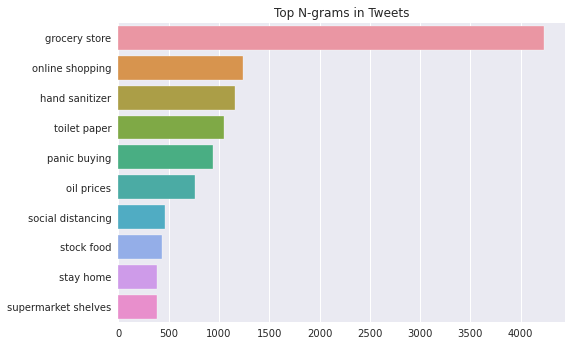

In [52]:
plot_ngrams(df, 2, False)

N-gram analysis has proven to be an effective form of topic modeelling. I would now like to see how N-grams differ acrosss sentiments.

In [53]:
df_x_pos = df.loc[df["Sentiment"] == "Extremely Positive"]
df_pos = df.loc[df["Sentiment"] == "Positive"]
df_n = df.loc[df["Sentiment"] == "Neutral"]
df_neg = df.loc[df["Sentiment"] == "Negative"]
df_x_neg = df.loc[df["Sentiment"] == "Extremely Negative"]

df_list = [df_x_pos, df_pos, df_n, df_neg, df_x_neg]

In [54]:
def ngram_by_sentiment(list):
    
    for df in df_list:
        plot_ngrams(df, 2, True)

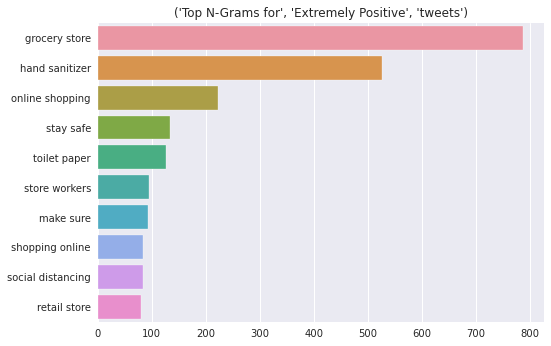

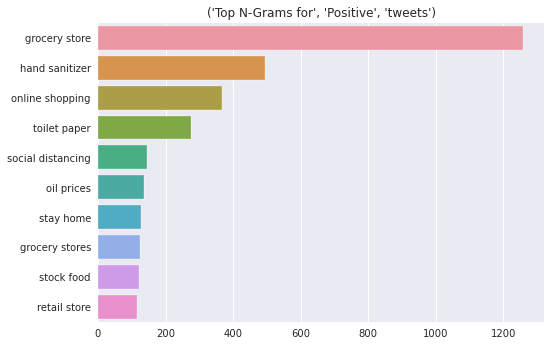

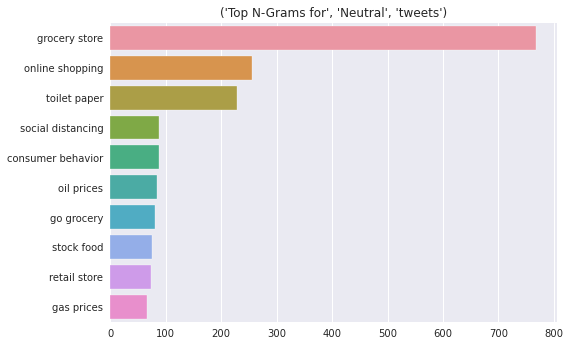

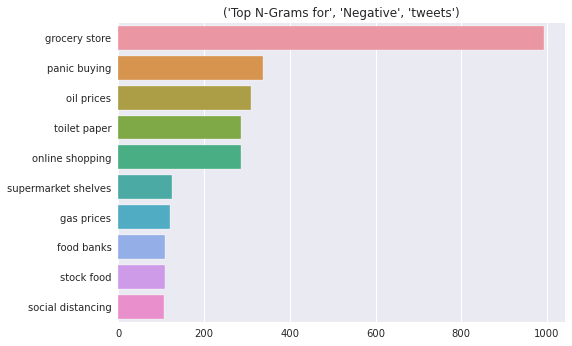

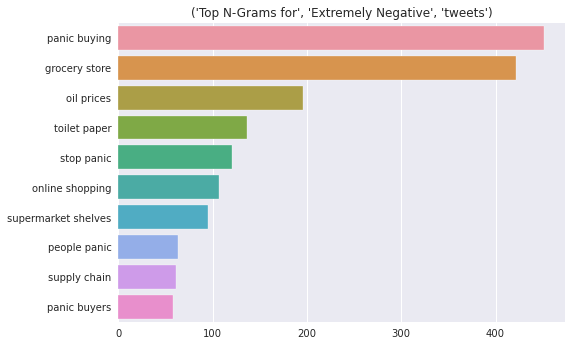

In [55]:
ngram_by_sentiment(df_list)

This wasn't massively useful, but it does show that "panic buying" and "oil prices" are frequent topics in negative and extremely negative tweets.

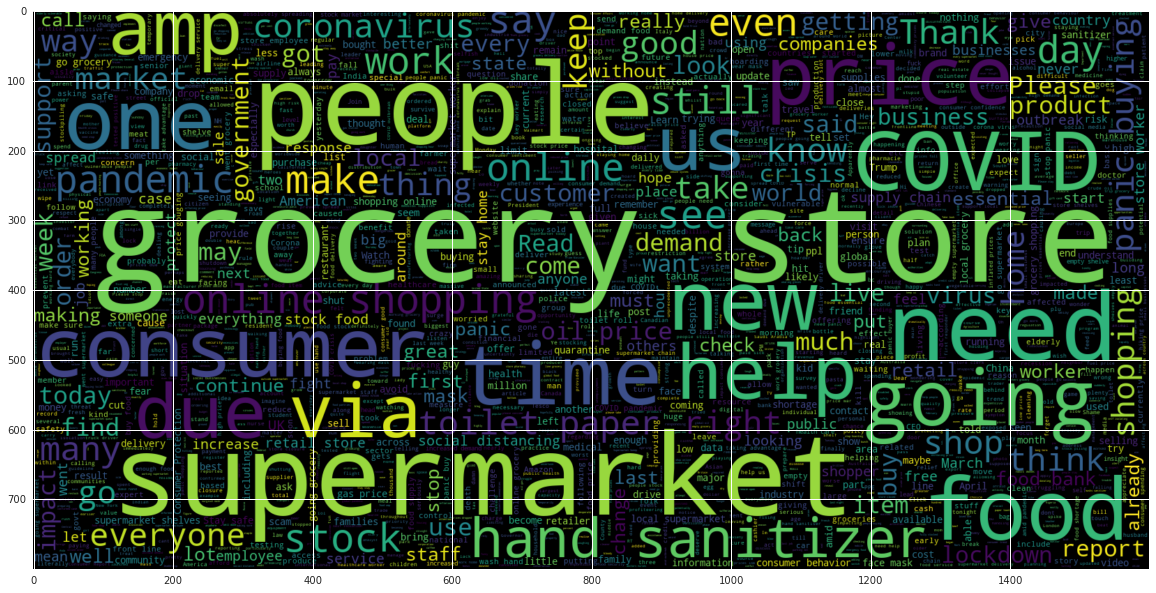

In [56]:
# Wordcloud for tweets

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df.Tweet))
plt.imshow(wc , interpolation = 'bilinear')